<a href="https://colab.research.google.com/github/andreusjh99/Learning-Tensorflow2.0/blob/master/Training_And_Evaluation_(Keras_API).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Training and Evaluation with Keras API (Basics)**
Author: [Chia Jing Heng](https://github.com/andreusjh99)

This notebook explores the basics of using the keras API to train and evaluate a model, and use it to make prediction. The bulk of this tutorial is from the [tensorflow official guide](https://www.tensorflow.org/guide/keras/train_and_evaluate).

## Setup

In [12]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


#### *Model function*
It doesn't matter what method you use to create the model. You could use the `Sequential API`, the `Functional API`, or your own model via model subclassing. 

To make it easier for the notebook, we are going to create a function for creating a model. (this is not necessary in the usual pipeline)

In [ ]:
# Using the Sequential API

def create_model():
    model = keras.Sequential(name = "Classifier")
    model.add(keras.Input(shape = (784,), name = "Digits"))
    model.add(layers.Dense(64, activation = "relu", name = "Input_layer"))
    model.add(layers.Dense(64, activation = "relu", name = "Hidden_dense_1"))
    model.add(layers.Dense(10, activation = "softmax", name = "predictions"))

    return model

# Training and Evaluation
Usual workflow:
1. Load data
2. Preprocess data
3. Create model
4. Compile model
5. Train model
6. Evaluate model
7. Make predictions

## 1, 2 Load and preprocess data

#### MNIST data
We are using the classic Mnist Data for this tutorial. More about the MNist Data could be found in the appendix of this notebook.

In [ ]:
# load the Mnist data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255 # reshape, cast and normalise
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32") # cast
y_test = y_test.astype("float32")

11493376/11490434 [==============================] - 0s 0us/step


To use the built-in training loops of a model, you should use either `NumPy` arrays or a `tf.data.Dataset` objects for your input and output.

In this tutorial, we will explore both forms and look at the subtle differences in how we fit the model.

## A. NumPy arrays

If your dataset are already numpy arrays then there is no more preprocessing of data needed.

You could split the training data up into training set and vaidation set if you like too:

    x_val = x_train[-10000:]
    y_val = y_train[-10000:]
    x_train = x_train[:-10000]
    y_train = y_train[:-10000]

But there is an easier way to do this and we will look at it shortly.


## 3 Create model

In [22]:
model1 = create_model()
model1.summary()

Model: "Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 64)                50240     
_________________________________________________________________
Hidden_dense_1 (Dense)       (None, 64)                4160      
_________________________________________________________________
predictions (Dense)          (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


## 4 Compile model

To train a model, you don't only need the model, but also need the loss fucntion, optimiser, and optionally, some metrics to monitor.

To specify those, you do it while you compile the model.

In [23]:
model.compile(
    optimizer = keras.optimizers.RMSprop(), # optimiser
    loss = keras.losses.SparseCategoricalCrossentropy(), # loss function
    metrics = [keras.metrics.SparseCategoricalAccuracy()] # list of metrics to monitor
)

#### **The `compile()` method**
Typically, the `compile()` method takes in 3 arguments.

The final one, `metrics` takes in a list of metrics to monitor while training.

The losses and metrics used in this motebook will be explained in the appendix of this notebook. For more info about other losses and metrics: [losses](https://keras.io/api/losses/), [metrics](https://keras.io/api/metrics/).

In many cases, if you are happy with the default settings for the optimisers, losses and metrics used, you could just specify them via string identifiers to keep it short.

    model.compile(
        optimizer="rmsprop", 
        loss="sparse_categorical_crossentropy", 
        metrics=["sparse_categorical_accuracy"]
    )


## 5 Train model
We train models by calling `fit()` on the training data.

### Hyperparameters

In [24]:
num_epochs = 5
batch_size = 64

### Fit model to training data

In [25]:
train_log = model.fit(
    x_train,
    y_train,
    batch_size = batch_size,
    epochs = num_epochs,
    validation_split = 0.2
)

Epoch 1/5
750/750 [==============================] - 2s 2ms/step - loss: 0.0291 - sparse_categorical_accuracy: 0.9910 - val_loss: 0.1202 - val_sparse_categorical_accuracy: 0.9730
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.0245 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.1325 - val_sparse_categorical_accuracy: 0.9700
Epoch 3/5
750/750 [==============================] - 2s 2ms/step - loss: 0.0228 - sparse_categorical_accuracy: 0.9927 - val_loss: 0.1344 - val_sparse_categorical_accuracy: 0.9713
Epoch 4/5
750/750 [==============================] - 2s 2ms/step - loss: 0.0201 - sparse_categorical_accuracy: 0.9940 - val_loss: 0.1390 - val_sparse_categorical_accuracy: 0.9711
Epoch 5/5
750/750 [==============================] - 2s 2ms/step - loss: 0.0170 - sparse_categorical_accuracy: 0.9947 - val_loss: 0.1399 - val_sparse_categorical_accuracy: 0.9729


#### **The `fit()` method**

The `fit()` method takes in multiple arguments. With this method you fit the model you compiled to your training data to start training.

* You could specify the batch size, number of epochs etc with this method.

* For train-val split, you could specify how much of your training data passed in which you want to keep for validation every epoch. A `validation_split` of 0.2 means the last 0.2 data in the training set will be reserved for validation at each epoch.

* You could also specify how often you want the model to be validated by specifying the `validation_freq`. Setting it to 1 means validating every epoch.

* If you have split the training set into training and validation set before-hand or if your dataset comes split into 3 sets (train, val, test), then you could also feed in the validation set by using the argument `validation_data` instead of specifying a `validation_split`. **NOTE: this is only possible if your data are `NumPy` arrays.**

        train_log = model.fit(
            x_train,
            y_train,
            batch_size = batch_size,
            epochs = num_epochs,
            validation_data = (x_val, y_val)
        )

**Note**: Calling `fit()` multiple times will NOT reset the weights, model state and optimiser state, i.e. the model will continue training from where it left off last time despite the output starts with epoch = 1.


### Access history and plot them
The returned "train_log" object holds a record of the loss values and metric values during training. This can be accessed using the `history` attribute.

In [27]:
train_log.history

{'loss': [0.029100023210048676,
  0.02445376291871071,
  0.022784769535064697,
  0.020139891654253006,
  0.016987403854727745],
 'sparse_categorical_accuracy': [0.9910208582878113,
  0.992562472820282,
  0.9927499890327454,
  0.9939583539962769,
  0.9947291612625122],
 'val_loss': [0.12020467221736908,
  0.13245591521263123,
  0.13443586230278015,
  0.13903550803661346,
  0.13992902636528015],
 'val_sparse_categorical_accuracy': [0.9729999899864197,
  0.9700000286102295,
  0.9713333249092102,
  0.9710833430290222,
  0.9729166626930237]}

Text(0.5, 0, 'Epoch')

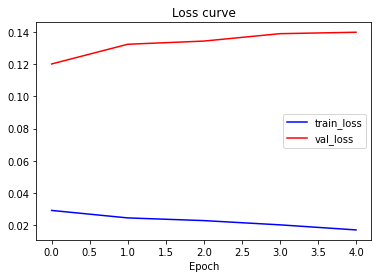

In [26]:
import matplotlib.pyplot as plt
plt.plot(train_log.history['loss'], 'b', label = "train_loss")
plt.plot(train_log.history['val_loss'], 'r', label = "val_loss")
plt.legend()
plt.title("Loss curve")
plt.xlabel("Epoch")